In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [ ]:
url = 'https://raw.githubusercontent.com/Georgetxm/SC1015/main/train.csv'
data = pd.read_csv(url)

In [ ]:
data.shape

(45593, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [ ]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


# Clean Time Taken

In [ ]:
data["Delivery_person_ID"].nunique()

1320

In [ ]:
data["Time_taken(min)"].describe()

count        45593
unique          45
top       (min) 26
freq          2123
Name: Time_taken(min), dtype: object

In [ ]:
data["Time_taken(min)"].unique()

array(['(min) 24', '(min) 33', '(min) 26', '(min) 21', '(min) 30',
       '(min) 40', '(min) 32', '(min) 34', '(min) 46', '(min) 23',
       '(min) 20', '(min) 41', '(min) 15', '(min) 36', '(min) 39',
       '(min) 18', '(min) 38', '(min) 47', '(min) 12', '(min) 22',
       '(min) 25', '(min) 35', '(min) 10', '(min) 19', '(min) 11',
       '(min) 28', '(min) 52', '(min) 16', '(min) 27', '(min) 49',
       '(min) 17', '(min) 14', '(min) 37', '(min) 44', '(min) 42',
       '(min) 31', '(min) 13', '(min) 29', '(min) 50', '(min) 43',
       '(min) 48', '(min) 54', '(min) 53', '(min) 45', '(min) 51'],
      dtype=object)

In [ ]:
data["Time_taken(min)"] = data["Time_taken(min)"].str.extract('(\d+)')

In [ ]:
data["Time_taken(min)"] = pd.to_numeric(data["Time_taken(min)"])
data["Time_taken(min)"].dropna()
data["Time_taken(min)"].astype('int64')

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int64

In [ ]:
data["Time_taken(min)"].unique()

array([24, 33, 26, 21, 30, 40, 32, 34, 46, 23, 20, 41, 15, 36, 39, 18, 38,
       47, 12, 22, 25, 35, 10, 19, 11, 28, 52, 16, 27, 49, 17, 14, 37, 44,
       42, 31, 13, 29, 50, 43, 48, 54, 53, 45, 51])

In [ ]:
data["Time_taken(min)"].dropna()

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int64

In [ ]:
data["Time_taken(min)"].count()

45593

# Clean Delivery Person Ratings

In [ ]:
data = data.drop(data[data['Delivery_person_Ratings']=='NaN '].index)
data = data.astype({'Delivery_person_Ratings':'float64'})
data['Delivery_person_Ratings'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, 3.8,
       3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4, 2.8,
       2.9, 3. ])

<Axes: xlabel='Delivery_person_Ratings', ylabel='Count'>

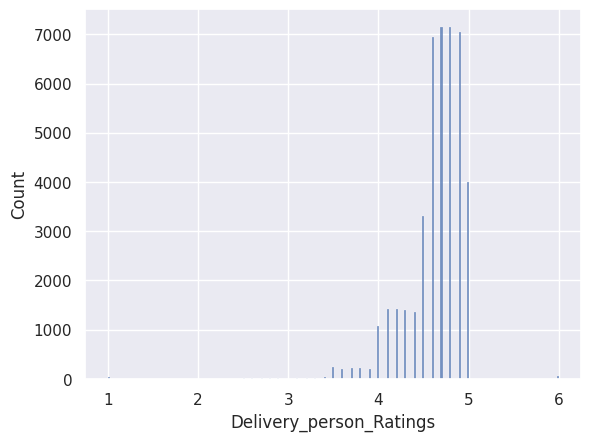

In [ ]:
sb.histplot(data = data['Delivery_person_Ratings'])

In [ ]:
print(f"Count of persons with 6 Ratings: {(data['Delivery_person_Ratings'] > 5).sum()}")

Count of persons with 6 Ratings: 53


### We believe that the rating of 6 is likely a data entry/technical error. Hence, we will be replacing it with 5.

In [ ]:
data.loc[data['Delivery_person_Ratings'] > 5, 'Delivery_person_Ratings'] = 5

In [ ]:
print(f"Count of persons with 6 Ratings: {(data['Delivery_person_Ratings'] > 5).sum()}")

Count of persons with 6 Ratings: 0


# Clean Delivery Person Age

In [ ]:
data["Delivery_person_Age"] = pd.to_numeric(data["Delivery_person_Age"])
data["Delivery_person_Age"].astype('int64')
data["Delivery_person_Age"].unique()

array([37, 34, 23, 38, 32, 22, 33, 35, 36, 21, 24, 29, 25, 31, 27, 26, 20,
       28, 39, 30, 15, 50])

<Axes: xlabel='Delivery_person_Age', ylabel='Count'>

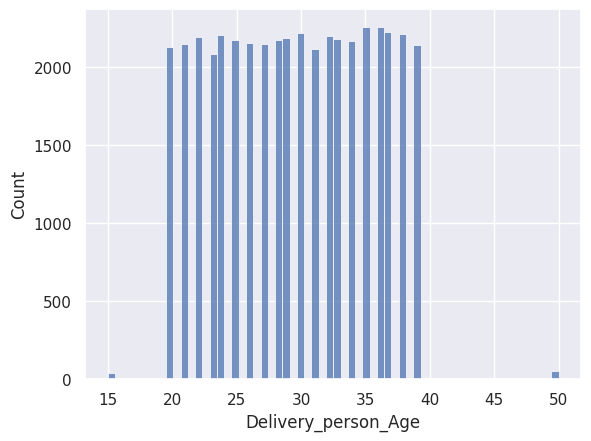

In [ ]:
sb.histplot(data = data["Delivery_person_Age"])

In [ ]:
print(f"There are {len(data[data['Delivery_person_Age'] >= 40]) + len(data[data['Delivery_person_Age'] <= 20])} outliers in age column")

There are 2219 outliers in age column


### Despite having age outliers, we will not drop it as it is representative of the data and may provide interesting insights in our EDA.

# Stripping unnecessary spacing in weather conditions


In [ ]:
data['Weatherconditions'] = data['Weatherconditions'].str.replace("conditions ", "")

In [ ]:
data["Weatherconditions"].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', 'NaN'],
      dtype=object)

# Stripping unnecessary spacing and replacing NaN with Mode in City column

In [ ]:
data["City"].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', 'NaN '], dtype=object)

In [ ]:
data["City"] = data['City'].str.replace(' ','')

In [ ]:
data["City"].unique()

array(['Urban', 'Metropolitian', 'Semi-Urban'], dtype=object)

In [ ]:
data['City'] = data['City'].replace('NaN', "Metropolitian") # Replacing NaN with Mode

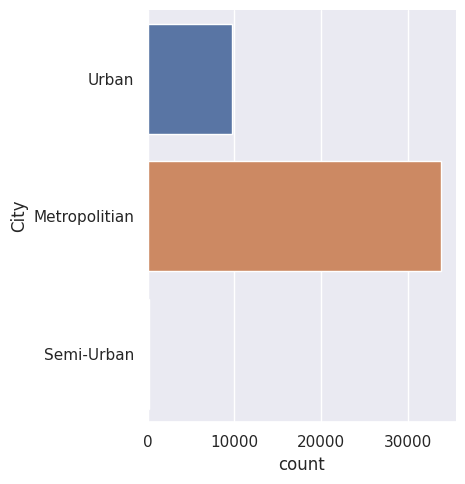

In [ ]:
sb.catplot(y = "City", data = data, kind = "count")

# Replacing NaN with Mode in Multiple_Deliveries Column

In [ ]:
print(data["multiple_deliveries"].unique())

['0' '1' '3' 'NaN ' '2']


In [ ]:
data['multiple_deliveries'] = data['multiple_deliveries'].replace('NaN ', "1") # Replacing NaN with Mode (1)

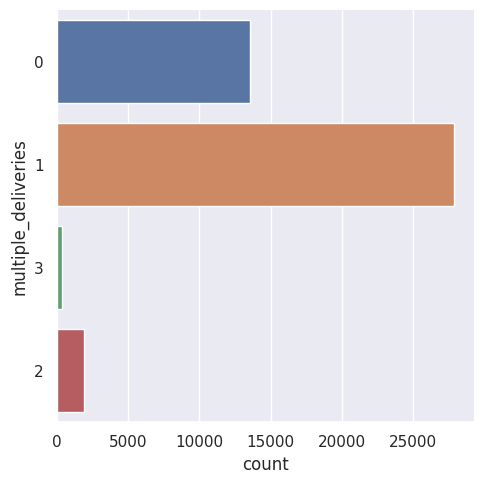

In [ ]:
sb.catplot(y = "multiple_deliveries", data = data, kind = "count")

# Stripping space of variables from Vehicle Column

In [ ]:
print(data["Type_of_vehicle"].unique())

['motorcycle ' 'scooter ' 'electric_scooter ' 'bicycle ']


In [ ]:
data["Type_of_vehicle"] = data["Type_of_vehicle"].str.replace(" ", "")
data["Type_of_vehicle"] = data["Type_of_vehicle"].str.capitalize()

In [ ]:
print(data["Type_of_vehicle"].unique())

['Motorcycle' 'Scooter' 'Electric_scooter' 'Bicycle']


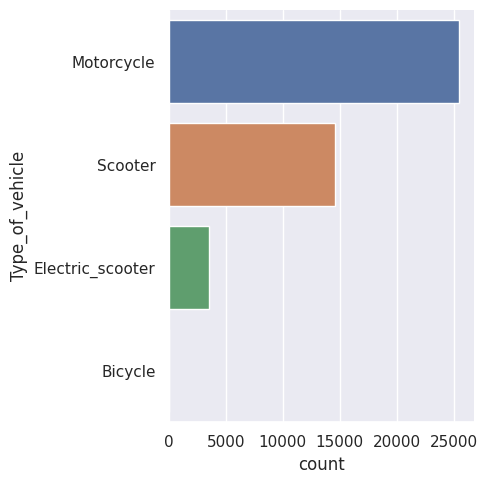

In [ ]:
sb.catplot(y = "Type_of_vehicle", data = data, kind = "count")

In [ ]:
print(data["Type_of_vehicle"].value_counts())

Motorcycle          25494
Scooter             14622
Electric_scooter     3554
Bicycle                15
Name: Type_of_vehicle, dtype: int64


# Stripping unnecesary space from variable names in Order column

In [ ]:
print(data["Type_of_order"].unique())

['Snack ' 'Drinks ' 'Buffet ' 'Meal ']


In [ ]:
data["Type_of_order"] = data["Type_of_order"].str.replace(" ", "")


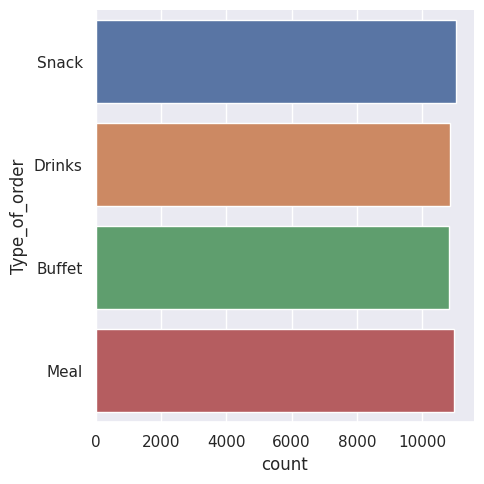

In [ ]:
sb.catplot(y = "Type_of_order", data = data, kind = "count")

In [ ]:
print(data["Type_of_order"].value_counts())

Snack     11041
Meal      10971
Drinks    10861
Buffet    10812
Name: Type_of_order, dtype: int64


In [ ]:
print(data["Vehicle_condition"].unique())

[2 0 1 3]


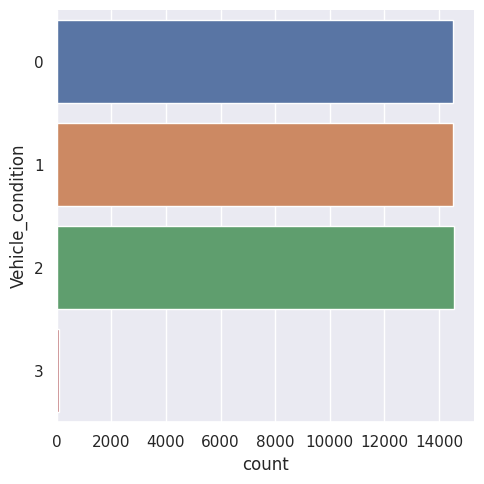

In [ ]:
sb.catplot(y = "Vehicle_condition", data = data, kind = "count")

# Stripping unnecessary space from Traffic Density column & replacing NaN with Mode

In [ ]:
print(data["Road_traffic_density"].unique())

['High ' 'Jam ' 'Low ' 'Medium ' 'NaN ']


In [ ]:
data["Road_traffic_density"] = data["Road_traffic_density"].str.replace(" ", "")

In [ ]:
data['Road_traffic_density'] = data['Road_traffic_density'].replace('NaN', "Low") # Replacing NaN with Mode (Low)

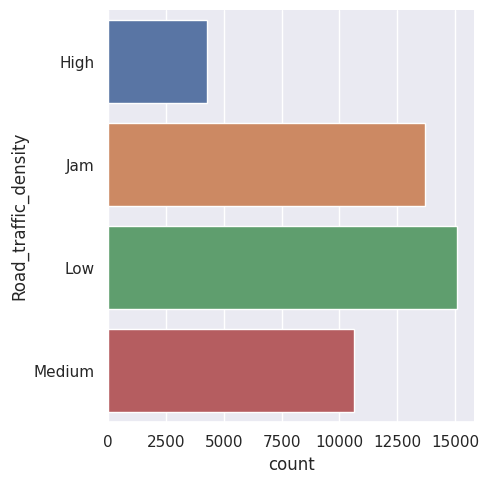

In [ ]:
sb.catplot(y = "Road_traffic_density", data = data, kind = "count")

### Stripping unnecessary space from Festival and replacing NaN with Mode.

In [ ]:
print(data["Festival"].unique())

['No ' 'Yes ' 'NaN ']


In [ ]:
print(data["Festival"].value_counts())

No      42614
Yes       854
NaN       217
Name: Festival, dtype: int64


In [ ]:
data["Festival"] = data["Festival"].str.replace(" ", "")

In [ ]:
data['Festival'] = data['Festival'].replace('NaN', "No") # Replacing NaN with Mode (No)

In [ ]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,Motorcycle,0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,Scooter,1,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,Motorcycle,1,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,Motorcycle,1,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,Scooter,1,No,Metropolitian,30


# Renaming Columns CamelCasing

In [ ]:
data = data.rename(columns={'Delivery_person_ID': 'DeliveryPersonID', 
                            'Delivery_person_Age': 'DeliveryPersonAge', 
                            'Delivery_person_Ratings': 'Ratings',
                            'Restaurant_latitude': 'RestaurantLat',
                            'Restaurant_longitude': 'RestaurantLon',
                            'Delivery_location_latitude': 'DeliveryLocationLat',
                            'Delivery_location_longitude': 'DeliveryLocationLon',
                            'Order_Date': 'OrderDate',
                            'Time_Orderd': 'TimeOrdered',
                            'Time_Order_picked': 'TimeOrderPickedUp',
                            'Weatherconditions': 'WeatherConditions',
                            'Road_traffic_density': 'RoadTrafficDensity',
                            'Vehicle_condition': 'VechicleCondition',
                            'Type_of_order': 'TypeOfOrder',
                            'Type_of_vehicle': 'TypeOfVehicle',
                            'multiple_deliveries': 'MultipleDeliveries',
                            'Time_taken(min)': 'TimeTaken'
                            })

In [ ]:
data.head()

,ID,DeliveryPersonID,DeliveryPersonAge,Ratings,RestaurantLat,RestaurantLon,DeliveryLocationLat,DeliveryLocationLon,OrderDate,TimeOrdered,TimeOrderPickedUp,WeatherConditions,RoadTrafficDensity,VechicleCondition,TypeOfOrder,TypeOfVehicle,MultipleDeliveries,Festival,City,TimeTaken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,Motorcycle,0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,Scooter,1,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,Motorcycle,1,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,Motorcycle,1,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,Scooter,1,No,Metropolitian,30


# Exporting Cleaned Data for EDA and Machine Learning Process

In [ ]:
data.to_csv(r'train_cleaned.csv', index=False)